In [2]:
import pandas as pd
import numpy as np

# Sample DataFrame based on provided information
data = {
    'Stage': ['Pre-seed', 'Strategic Angels', 'Seed', 'Strategic Bridge', 'Series A', 'Private Sale', 'TGE', 'Revenues'],
    'Employees': [7, 3, 20, 15, 20, 5, 10, 15]  # Number of new employees per stage
}
df = pd.DataFrame(data)

# Function to assign score based on cumulative employee position
def assign_score(position):
    if position < 10:
        return 2
    elif position < 25:
        return 1.8
    elif position < 50:
        return 1.5
    elif position < 100:
        return 2.5
    elif position < 150:
        return 1
    else:
        return 0  # If out of range

# Initialize variables to store cumulative position and mean scores
cumulative_position = 0
mean_scores = []

for _, row in df.iterrows():
    stage = row['Stage']
    num_employees = row['Employees']
    
    # Calculate scores for each new employee in this stage
    scores = []
    for i in range(1, num_employees + 1):
        cumulative_position += 1
        score = assign_score(cumulative_position)
        scores.append(score)
    
    # Calculate the mean score for the current stage
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

# Add mean scores to DataFrame
df['Mean_Score'] = mean_scores

print(df[['Stage', 'Mean_Score']])


              Stage  Mean_Score
0          Pre-seed    2.000000
1  Strategic Angels    1.933333
2              Seed    1.710000
3  Strategic Bridge    1.500000
4          Series A    2.300000
5      Private Sale    2.500000
6               TGE    2.500000
7          Revenues    2.500000


In [15]:
import numpy as np

def calculate_mean_scores(new_employees, scores):
    """
    Calculate mean JT scores for each funding stage based on cumulative joining position and configurable scores.

    Parameters:
    new_employees (list of int): List of new employee counts per funding stage.
    scores (list of float): List of scores for each threshold [<10, <25, <50, <100, <150].

    Returns:
    list of float: Mean JT score for each funding stage.
    """
    # Fixed thresholds
    thresholds = [10, 25, 50, 100, 150]
    cumulative_position = 0
    mean_scores = []

    # Function to assign score based on cumulative position using fixed thresholds and provided scores
    def assign_score(position):
        for i, threshold in enumerate(thresholds):
            if position < threshold:
                return scores[i]
        return 0  # Default score if position exceeds all thresholds

    # Loop through each stage
    for num_employees in new_employees:
        # Calculate scores for each new employee in this stage
        stage_scores = []
        for _ in range(num_employees):
            cumulative_position += 1
            score = assign_score(cumulative_position)
            stage_scores.append(score)

        # Calculate the mean score for the current stage
        mean_score = np.mean(stage_scores)
        mean_scores.append(mean_score)

    return mean_scores


In [61]:

e = [7,3,20,15,20,5,10,15]
s = [2,1.8,1.5,2.5,1]

In [62]:
calculate_mean_scores(e,s)

[2.0, 1.9333333333333333, 1.7100000000000002, 1.5, 2.3, 2.5, 2.5, 2.5]

In [63]:
import json
from models import CategoricalCriteriaPart


In [72]:
def calculate_score(raw_json, criteria_list):
    # Initialize the result dictionary
    result = {
        "rounds": []
    }

    # Loop through the raw_json (which is a list of rounds)
    for round_data in raw_json:
        round_result = {
            "round": round_data["Round"],
            "employee_count": round_data["Employees"],
            "criteria_scores": {},
            "JT_score": round_data["JT"],
        }

        
        # Calculate scores for other criteria (Salary, Role, etc.)
        for criterion, selected_value in round_data.items():
            if criterion == "Round" or criterion == "Employees" or criterion == "JT":
                continue  # Skip non-criteria fields

            # Search for the matching criteria
            matched_criteria = next((c for c in criteria_list if c.label == criterion), None)
            
            if matched_criteria:
                for part in matched_criteria.criteria_parts:
                    if isinstance(part, CategoricalCriteriaPart) and part.label == selected_value:
                        round_result["criteria_scores"][criterion] = part.score
                        break
        
        # Add round result to the final result
        result["rounds"].append(round_result)

    # Return the result as a JSON object
    return json.dumps(result, indent=4)

In [98]:
raw_json = [
    {
        "Round":"Pre-seed",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    },
    {
        "Round":"Strategic Angels",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    },
    {
        "Round":"Seed",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    },
    {
        "Round":"Strategic Bridge",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    },
    {
        "Round":"Series A",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    },
    {
        "Round":"Private Sale",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":10,
        "JT":0
    },
    {
        "Round":"TGE",
        "Seniority Level":"Entry Level",
        "Role Importance":"Engineering",
        "Salary Compensation":"< 100k",
        "Bonus - Individual Performance":"Needs Improvement",
        "Bonus - Project Impact":"Standard",
        "Bonus - Inovation Contribution":"Standard",
        "Bonus - Tenure Adjustement":"0-2 Years",
        "Bonus - Composition Factor":"100% Toekns",
        "Employees":0,
        "JT":0
    }
]

In [99]:

from criterias import get_criteria_list


criteria_list = get_criteria_list()



In [100]:
result_json = json.loads(calculate_score(raw_json, criteria_list))

In [101]:
result_json["rounds"][6]

{'round': 'TGE',
 'employee_count': 0,
 'criteria_scores': {'Seniority Level': 1.0,
  'Role Importance': 1.0,
  'Salary Compensation': 1.2,
  'Bonus - Individual Performance': 2.0,
  'Bonus - Project Impact': 2.0,
  'Bonus - Inovation Contribution': 1.0,
  'Bonus - Tenure Adjustement': 1.0,
  'Bonus - Composition Factor': 1.0},
 'JT_score': 0}

In [102]:
result_json

{'rounds': [{'round': 'Pre-seed',
   'employee_count': 0,
   'criteria_scores': {'Seniority Level': 1.0,
    'Role Importance': 1.0,
    'Salary Compensation': 1.2,
    'Bonus - Individual Performance': 2.0,
    'Bonus - Project Impact': 2.0,
    'Bonus - Inovation Contribution': 1.0,
    'Bonus - Tenure Adjustement': 1.0,
    'Bonus - Composition Factor': 1.0},
   'JT_score': 0},
  {'round': 'Strategic Angels',
   'employee_count': 0,
   'criteria_scores': {'Seniority Level': 1.0,
    'Role Importance': 1.0,
    'Salary Compensation': 1.2,
    'Bonus - Individual Performance': 2.0,
    'Bonus - Project Impact': 2.0,
    'Bonus - Inovation Contribution': 1.0,
    'Bonus - Tenure Adjustement': 1.0,
    'Bonus - Composition Factor': 1.0},
   'JT_score': 0},
  {'round': 'Seed',
   'employee_count': 0,
   'criteria_scores': {'Seniority Level': 1.0,
    'Role Importance': 1.0,
    'Salary Compensation': 1.2,
    'Bonus - Individual Performance': 2.0,
    'Bonus - Project Impact': 2.0,
    '

In [105]:
def get_employees(data, spec):
    employees = []
    for r in data["rounds"]:
        employees.append(r[spec])
    return employees

In [107]:
get_employees(result_json,"round")

['Pre-seed',
 'Strategic Angels',
 'Seed',
 'Strategic Bridge',
 'Series A',
 'Private Sale',
 'TGE']

In [108]:
def calculate_adjusted_coefficient(round):
    SL_central = round["criteria_scores"]["Seniority Level"]
    RI_central = round["criteria_scores"]["Role Importance"]
    SC_central = round["criteria_scores"]["Salary Compensation"]
    JT = round["JT_score"]
    return (SL_central + RI_central + SC_central + JT) / 4

{'round': 'Pre-seed',
 'employee_count': 0,
 'criteria_scores': {'Seniority Level': 1.0,
  'Role Importance': 1.0,
  'Salary Compensation': 1.2,
  'Bonus - Individual Performance': 2.0,
  'Bonus - Project Impact': 2.0,
  'Bonus - Inovation Contribution': 1.0,
  'Bonus - Tenure Adjustement': 1.0,
  'Bonus - Composition Factor': 1.0},
 'JT_score': 0}

In [114]:
calculate_adjusted_coefficient(result_json["rounds"][0])

0.8

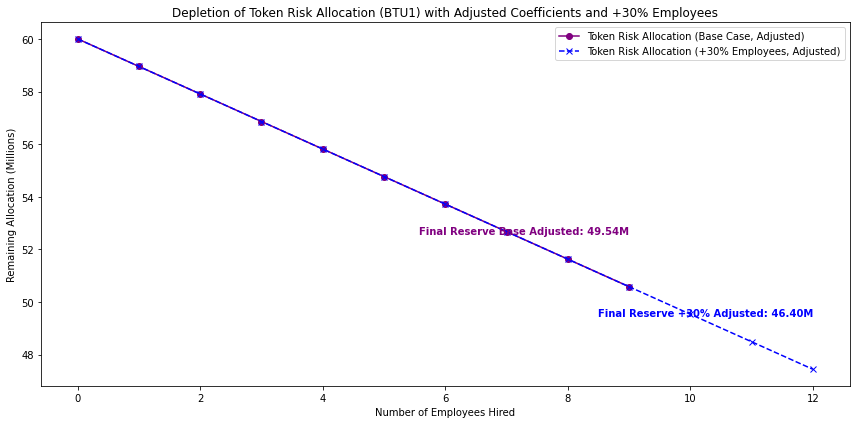

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Données pour les phases et leurs employés de base
employees_per_phase = get_employees(result_json,"employee_count") # Nombre d'employés pour chaque phase

# Allocation de base et BTU
total_tokens_for_employees = 60_000_000  # Allocation pour la déplétion normale avec risque
BTU = total_tokens_for_employees // sum(employees_per_phase)  # BTU de base pour la déplétion normale

# Coefficients de risque pour chaque phase
risk_coefficients = [1.0, 0.598, 0.5, 0.32, 0.267, 0.218, 0.19, 0.19]

# Fonction pour obtenir le coefficient ajusté basé sur les critères SL, RI, SC, et JT
def calculate_adjusted_coefficient(round):
    SL_central = round["criteria_scores"]["Seniority Level"]
    RI_central = round["criteria_scores"]["Role Importance"]
    SC_central = round["criteria_scores"]["Salary Compensation"]
    JT = round["JT_score"]
    return (SL_central + RI_central + SC_central + JT) / 4

# Simulation de déplétion pour le risque en utilisant le coefficient ajusté
def simulate_depletion_full_with_adjustment(allocation, btu, risk_coefficients, employees_per_phase, stages):
    remaining_allocation = []
    for i, (employees, risk_coef, stage) in enumerate(zip(employees_per_phase, risk_coefficients, stages)):
        adjusted_coefficient = calculate_adjusted_coefficient(stage)
        for _ in range(employees):
            if allocation > 0:
                remaining_allocation.append(allocation / 1_000_000)  # En millions
                allocation -= btu * risk_coef * adjusted_coefficient
            else:
                remaining_allocation.append(0)  # Allocation épuisée
    return remaining_allocation, allocation / 1_000_000  # En millions

# Cas de +30% d'employés supplémentaires
employees_per_phase_30_percent_increase = [int(employees * 1.3) for employees in employees_per_phase]

# Simulations pour risque (BTU1) avec base et +30% employés avec ajustement
remaining_allocation_with_risk_adjusted, final_reserve_adjusted = simulate_depletion_full_with_adjustment(total_tokens_for_employees, BTU, risk_coefficients, employees_per_phase, result_json["rounds"])
remaining_allocation_risk_30_adjusted, final_reserve_risk_30_adjusted = simulate_depletion_full_with_adjustment(total_tokens_for_employees, BTU, risk_coefficients, employees_per_phase_30_percent_increase, result_json["rounds"])

# Tracer le graphique pour la déplétion liée au risque (BTU1) avec ajustement et +30% d'employés
plt.figure(figsize=(12, 6))
plt.plot(range(len(remaining_allocation_with_risk_adjusted)), remaining_allocation_with_risk_adjusted, marker='o', color='purple', label="Token Risk Allocation (Base Case, Adjusted)")
plt.plot(range(len(remaining_allocation_risk_30_adjusted)), remaining_allocation_risk_30_adjusted, marker='x', color='blue', linestyle='--', label="Token Risk Allocation (+30% Employees, Adjusted)")
plt.xlabel("Number of Employees Hired")
plt.ylabel("Remaining Allocation (Millions)")
plt.title("Depletion of Token Risk Allocation (BTU1) with Adjusted Coefficients and +30% Employees")
plt.legend()
plt.tight_layout()
plt.text(len(remaining_allocation_with_risk_adjusted)-1, remaining_allocation_with_risk_adjusted[-1] + 2, f'Final Reserve Base Adjusted: {final_reserve_adjusted:.2f}M', color='purple', ha='right', fontsize=10, weight='bold')
plt.text(len(remaining_allocation_risk_30_adjusted)-1, remaining_allocation_risk_30_adjusted[-1] + 2, f'Final Reserve +30% Adjusted: {final_reserve_risk_30_adjusted:.2f}M', color='blue', ha='right', fontsize=10, weight='bold')
plt.show()


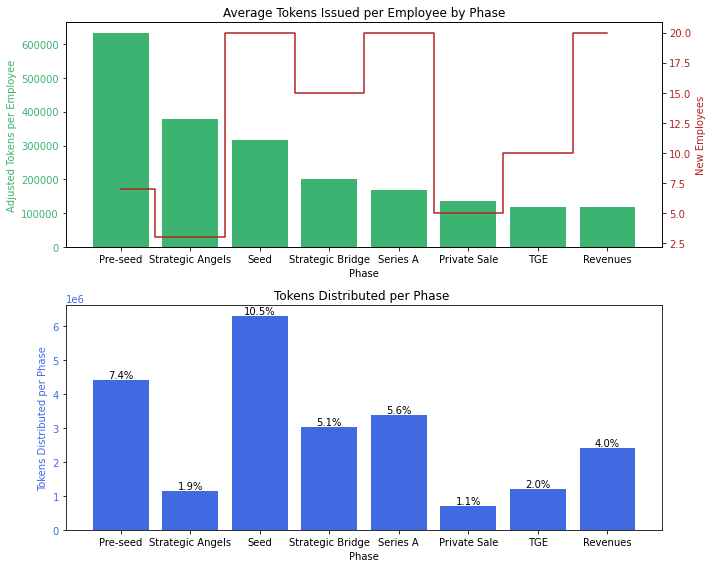

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Définition des données initiales
data_employees = {
    "Phase": [
        "Pre-seed", "Strategic Angels", "Seed", "Strategic Bridge", 
        "Series A", "Private Sale", "TGE", "Revenues"
    ],
    "New Employee": [7, 3, 20, 15, 20, 5, 10, 20]
}

# Création d'un DataFrame
df_employees = pd.DataFrame(data_employees)

# Calcul du BTU initial basé sur l'hypothèse de 95 employés finaux
max_supply = 1_000_000_000
allocated_tokens = max_supply * 0.06  # 6% de l'offre maximale
hypothetical_total_employees = 95
BTU_initial = allocated_tokens / hypothetical_total_employees  # Base Token Unit

# Coefficients de risque pour chaque phase
risk_coefficients = {
    "Pre-seed": 1.0,
    "Strategic Angels": 0.598,
    "Seed": 0.5,
    "Strategic Bridge": 0.32,
    "Series A": 0.267,
    "Private Sale": 0.218,
    "TGE": 0.19,
    "Revenues": 0.19
}

# Associer les coefficients de risque au DataFrame
df_employees['Risk Coefficient'] = df_employees['Phase'].map(risk_coefficients)

# Calcul des tokens ajustés par employé pour chaque phase en utilisant BTU initial
df_employees['Adjusted Tokens per Employee'] = BTU_initial * df_employees['Risk Coefficient']

# Calcul du total des tokens distribués pour chaque phase
df_employees['Tokens Distributed per Phase'] = df_employees['New Employee'] * df_employees['Adjusted Tokens per Employee']

# Calcul du pourcentage de tokens distribués par phase par rapport à l'allocation totale
df_employees['Percentage of Total Allocation'] = (df_employees['Tokens Distributed per Phase'] / allocated_tokens) * 100

# Visualisation des résultats avec deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Premier graphique - Tokens ajustés par employé et nouveaux employés par phase (sans annotations de pourcentage)
bars = ax1.bar(df_employees['Phase'], df_employees['Adjusted Tokens per Employee'], color='mediumseagreen', label='Adjusted Tokens per Employee')
ax1.set_xlabel("Phase")
ax1.set_ylabel("Adjusted Tokens per Employee", color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen')

# Ajouter les nouveaux employés en créneaux
ax2_1 = ax1.twinx()
ax2_1.step(df_employees['Phase'], df_employees['New Employee'], color='firebrick', where='mid', label='New Employees')
ax2_1.set_ylabel("New Employees", color='firebrick')
ax2_1.tick_params(axis='y', labelcolor='firebrick')

ax1.set_title("Average Tokens Issued per Employee by Phase")

# Second graphique - Tokens distribués par phase sans cumul avec annotations de pourcentage
bars2 = ax2.bar(df_employees['Phase'], df_employees['Tokens Distributed per Phase'], color='royalblue', label='Tokens Distributed per Phase')
ax2.set_xlabel("Phase")
ax2.set_ylabel("Tokens Distributed per Phase", color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_title("Tokens Distributed per Phase ")

# Annoter chaque barre avec le pourcentage de répartition du total alloué
for bar, pct in zip(bars2, df_employees['Percentage of Total Allocation']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


In [119]:
df_employees

,Phase,New Employee,Risk Coefficient,Adjusted Tokens per Employee,Tokens Distributed per Phase,Percentage of Total Allocation
0,Pre-seed,7,1.000,631578.947368,4.421053e+06,7.368421
1,Strategic Angels,3,0.598,377684.210526,1.133053e+06,1.888421
2,Seed,20,0.500,315789.473684,6.315789e+06,10.526316
3,Strategic Bridge,15,0.320,202105.263158,3.031579e+06,5.052632
4,Series A,20,0.267,168631.578947,3.372632e+06,5.621053
5,Private Sale,5,0.218,137684.210526,6.884211e+05,1.147368
6,TGE,10,0.190,120000.000000,1.200000e+06,2.000000
7,Revenues,20,0.190,120000.000000,2.400000e+06,4.000000


In [ ]:
# Visualisation des résultats avec deux graphiques
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

            # Premier graphique - Tokens ajustés par employé et nouveaux employés par phase (sans annotations de pourcentage)
            bars = ax1.bar(df_employees['Phase'], df_employees['Adjusted Tokens per Employee'], color='mediumseagreen', label='Adjusted Tokens per Employee')
            ax1.set_xlabel("Phase")
            ax1.set_ylabel("Adjusted Tokens per Employee", color='mediumseagreen')
            ax1.tick_params(axis='y', labelcolor='mediumseagreen')

            # Ajouter les nouveaux employés en créneaux
            ax2_1 = ax1.twinx()
            ax2_1.step(df_employees['Phase'], df_employees['New Employee'], color='firebrick', where='mid', label='New Employees')
            ax2_1.set_ylabel("New Employees", color='firebrick')
            ax2_1.tick_params(axis='y', labelcolor='firebrick')

            ax1.set_title("Average Tokens Issued per Employee by Phase")

            # Second graphique - Tokens distribués par phase sans cumul avec annotations de pourcentage
            bars2 = ax2.bar(df_employees['Phase'], df_employees['Tokens Distributed per Phase'], color='royalblue', label='Tokens Distributed per Phase')
            ax2.set_xlabel("Phase")
            ax2.set_ylabel("Tokens Distributed per Phase", color='royalblue')
            ax2.tick_params(axis='y', labelcolor='royalblue')
            ax2.set_title("Tokens Distributed per Phase ")

            # Annoter chaque barre avec le pourcentage de répartition du total alloué
            for bar, pct in zip(bars2, df_employees['Percentage of Total Allocation']):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

            plt.tight_layout()
            st.pyplot(fig)

In [120]:
risk_coef = [1.0, 0.598, 0.5, 0.32, 0.267, 0.218, 0.19, 0.19]

In [122]:
842105 * risk_coef

[1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.267,
 0.218,
 0.19,
 0.19,
 1.0,
 0.598,
 0.5,
 0.32,
 0.2

In [127]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [126]:
%pip install numpy==1.23.5

   ---------------------------------------- 14.6/14.6 MB 1.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import skewnorm

In [10]:
def get_cycle_from_date(date_str):
    date = pd.to_datetime(date_str)
    return int((date - start_date).days // 182) + 1  # Conversion en cycles de 6 mois, ajusté pour commencer à 1

def initialize_arrival_cycles(employee_arrivals):
    arrival_cycles = []
    for phase, (num_employees, start, end) in employee_arrivals.items():
        start_cycle = get_cycle_from_date(start)
        end_cycle = get_cycle_from_date(end)
        arrival_cycles.extend([random.randint(start_cycle, end_cycle) for _ in range(num_employees)])
    return arrival_cycles

In [11]:
def generate_stochastic_coefficients(skewness=skewness_input):
    def skewed_choice(values):
        choice = list(values.values())
        if skewness == 0:
            return random.choice(choice)
        else:
            skewed_distribution = skewnorm.rvs(a=skewness, size=1)
            index = min(max(int((skewed_distribution[0] + 1) * (len(choice) / 2)), 0), len(choice) - 1)
            return choice[index]
    
    return {
        "IP": skewed_choice(IP_values),
        "PI": skewed_choice(PI_values),
        "IC": skewed_choice(IC_values),
        "TA": skewed_choice(TA_values)
    }

def adjust_score(score):
    variation = random.uniform(-0.3, 0.3)  # Variation de -30% à +30%
    return score * (1 + variation)

In [12]:
def simulate_employee_paths_custom(arrival_cycles, btu, bcf_options, total_allocation, skewness=0, cycles=8, min_token=1_000):
    employee_paths = {emp: [] for emp in range(len(arrival_cycles))}
    remaining_allocation = []
    
    for cycle in range(1, cycles + 1):  # Parcourir chaque cycle, en commençant à 1
        cycle_allocation = total_allocation
        for employee_id, arrival_cycle in enumerate(arrival_cycles):
            if arrival_cycle > cycle:
                employee_paths[employee_id].append(employee_paths[employee_id][-1] if employee_paths[employee_id] else 0)
                continue
            
            coefficients = generate_stochastic_coefficients(skewness)
            base_score = (coefficients["IP"] + coefficients["PI"] + coefficients["IC"] + coefficients["TA"]) / 4
            adjusted_score = adjust_score(base_score)
            
            bcf = random.choice(list(bcf_options.values()))
            tokens_received = max(btu * bcf * adjusted_score, min_token)
            
            tokens_distributed = min(tokens_received, total_allocation)
            cycle_allocation -= tokens_distributed
            total_allocation -= tokens_distributed
            if employee_paths[employee_id]:
                employee_paths[employee_id].append(employee_paths[employee_id][-1] + tokens_distributed / 1_000_000)
            else:
                employee_paths[employee_id].append(tokens_distributed / 1_000_000)
        
        remaining_allocation.append(total_allocation / 1_000_000)
    
    return employee_paths, remaining_allocation

In [13]:


# --- INPUTS ---

# Allocation totale de tokens pour les bonus
total_tokens_for_bonus = 20_000_000  # 2% de l'allocation totale
cycles = 8  # Nombre de cycles de 6 mois (4 ans)
BTU2 = total_tokens_for_bonus / ((95) * cycles)

# Options de BCF (Bonus Composition Factor) pourcentage en tokens
bcf_options = {1.0: 1.0, 0.85: 0.85, 0.7: 0.7, 0.55: 0.55}

# Skewness pour ajuster les scores, réglable
skewness_input = 0

# Arrivée des employés par période de financement, avec +30 % d'employés en plus
employee_arrivals_base = {
    "Pre-seed": (7, "2024-05-01", "2024-10-31"),
    "Strategic Angels": (3, "2024-11-01", "2024-12-31"),
    "Seed": (20, "2025-01-01", "2025-04-30"),
    "Strategic Bridge": (15, "2025-05-01", "2025-08-31"),
    "Series A": (20, "2025-09-01", "2025-11-30"),
    "Private Sale": (5, "2025-12-01", "2026-02-28"),
    "TGE": (5, "2026-03-01", "2026-04-30"),
    "Revenue": (5, "2026-05-01", "2029-05-31")
}

# Appliquer +30% d'employés sur chaque phase
employee_arrivals_30 = {phase: (int(count * 1.3), start, end) for phase, (count, start, end) in employee_arrivals_base.items()}

# Coefficients pour chaque critère de performance (IP, PI, IC, TA)
IP_values = {"Needs Improvement": 2, "Meets Expectations": 1.8, "Exceeds Expectations": 1.5, "Outstanding": 1.2, "Exceptional": 1}
PI_values = {"Standard": 1, "High Impact": 1.25, "Critical Success": 1.5}
IC_values = {"Standard": 1, "Notable Innovation": 1.15, "Significant Innovation": 1.3}
TA_values = {"0-2 Years": 1, "2-4 Years": 1.1, "4+ Years": 1.2}

# Convertir les dates en format cycle
start_date = pd.to_datetime("2024-05-01")


In [22]:
cycles

8

In [14]:
arrival_cycles_base = initialize_arrival_cycles(employee_arrivals_base)
arrival_cycles_30 = initialize_arrival_cycles(employee_arrivals_30)

employee_paths_base, remaining_allocation_base = simulate_employee_paths_custom(
    arrival_cycles_base, BTU2, bcf_options, total_tokens_for_bonus, skewness=skewness_input, cycles=cycles
)
employee_paths_30, remaining_allocation_30 = simulate_employee_paths_custom(
    arrival_cycles_30, BTU2, bcf_options, total_tokens_for_bonus, skewness=skewness_input, cycles=cycles
)

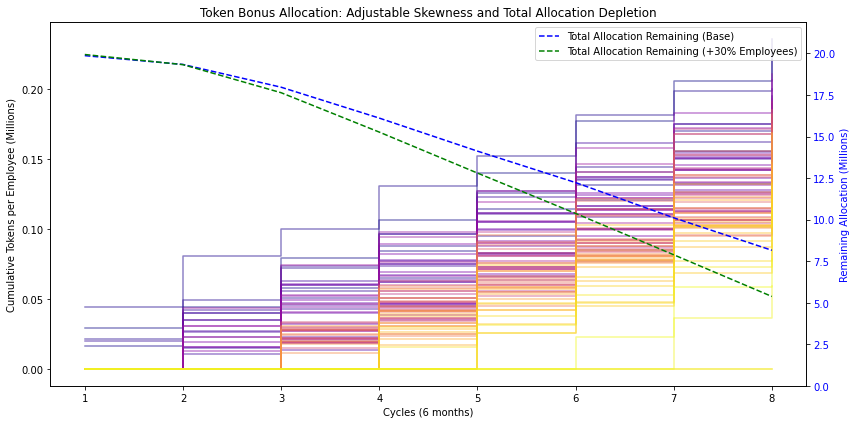

In [15]:
plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(employee_paths_base)))  # Palette de couleurs plus distincte
for idx, (employee_id, path) in enumerate(employee_paths_base.items()):
    plt.step(range(1, len(path) + 1), path, where='post', alpha=0.5, color=colors[idx])

plt.xlabel("Cycles (6 months)")
plt.ylabel("Cumulative Tokens per Employee (Millions)")
plt.title("Token Bonus Allocation: Adjustable Skewness and Total Allocation Depletion")

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(range(1, len(remaining_allocation_base) + 1), remaining_allocation_base, color='blue', linestyle='--', label="Total Allocation Remaining (Base)")
ax2.set_ylim(0, max(remaining_allocation_base) + 2)
ax2.set_ylabel("Remaining Allocation (Millions)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax2.plot(range(1, len(remaining_allocation_30) + 1), remaining_allocation_30, color='green', linestyle='--', label="Total Allocation Remaining (+30% Employees)")

ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [23]:
rounds = [
    "Pre-seed", "Strategic Angels", "Seed", 
    "Strategic Bridge", "Series A", "Private Sale", 
    "TGE", "Revenue"
]

employee_numbers = [7, 3, 20, 15, 20, 5, 5, 5]
start_dates = [
    "2024-05-01", "2024-11-01", "2025-01-01", 
    "2025-05-01", "2025-09-01", "2025-12-01", 
    "2026-03-01", "2026-05-01"
]
end_dates = [
    "2024-10-31", "2024-12-31", "2025-04-30", 
    "2025-08-31", "2025-11-30", "2026-02-28", 
    "2026-04-30", "2029-05-31"
]

employee_arrivals_base = {
    rounds[i]: (employee_numbers[i], start_dates[i], end_dates[i]) 
    for i in range(len(rounds))
}

print(employee_arrivals_base)


{'Pre-seed': (7, '2024-05-01', '2024-10-31'), 'Strategic Angels': (3, '2024-11-01', '2024-12-31'), 'Seed': (20, '2025-01-01', '2025-04-30'), 'Strategic Bridge': (15, '2025-05-01', '2025-08-31'), 'Series A': (20, '2025-09-01', '2025-11-30'), 'Private Sale': (5, '2025-12-01', '2026-02-28'), 'TGE': (5, '2026-03-01', '2026-04-30'), 'Revenue': (5, '2026-05-01', '2029-05-31')}


In [24]:
start_date = pd.to_datetime("2024-05-01")

In [25]:
start_date

Timestamp('2024-05-01 00:00:00')